K Means Clustering Analysis of English Premier League Football Players

Step 1: Importing Modules

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from sklearn.preprocessing import StandardScaler


Step 2: Reading the csv file

In [46]:
df = pd.read_csv("C:/Users/Shanmukh.Maddila/Downloads/Fantasy Sports (1) (2).csv")

In [47]:
df.head(5)

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0
1,Alexandre Lacazette,Arsenal,Forward,13,3,129,1916,21,307.4,602.4,797,21,7
2,Bernd Leno,Arsenal,Goalkeeper,0,0,131,3131,37,0.0,702.2,2,11,11
3,Bukayo Saka,Arsenal,Midfielder,5,5,114,2554,31,650.6,493.0,984,8,8
4,Calum Chambers,Arsenal,Defender,0,3,36,751,10,169.4,171.8,77,3,2


In [48]:
df.tail(5)

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
471,Ruben Vinagre,Wolverhampton Wanderers,Defender,0,0,1,172,7,25.3,31.2,0,0,0
472,Rui Pedro Patricio,Wolverhampton Wanderers,Goalkeeper,0,0,132,3330,51,0.0,763.6,0,12,10
473,Vitor Ferreira,Wolverhampton Wanderers,Midfielder,0,1,26,509,8,179.0,80.0,72,0,0
474,Willian Jose,Wolverhampton Wanderers,Forward,1,1,40,1106,13,165.9,89.6,256,3,5
475,Willy Boly,Wolverhampton Wanderers,Defender,1,1,68,1879,29,46.1,414.0,182,4,6


Step 3: Basics checks on the file such as

a. shape and size

b. data types

c. missing values

d. Duplicate rows

a. Shape and Size:

Inference from shape :

476 rows of data

13 columns

In [49]:
df.shape

(476, 13)

b Understanding Data Types:

Inference is data types are as per normal convention

In [50]:
df.dtypes

Player_Name        object
Club               object
Position           object
Goals_Scored        int64
Assists             int64
Total_Points        int64
Minutes             int64
Goals_Conceded      int64
Creativity        float64
Influence         float64
Threat              int64
Bonus               int64
Clean_Sheets        int64
dtype: object

C. Missing Values Computation

Inference : No Null Values in the Dataset

In [51]:
df.isnull().sum()

Player_Name       0
Club              0
Position          0
Goals_Scored      0
Assists           0
Total_Points      0
Minutes           0
Goals_Conceded    0
Creativity        0
Influence         0
Threat            0
Bonus             0
Clean_Sheets      0
dtype: int64

D.Duplicate rows

Inference :No Duplicate rows

In [52]:
duplicates = df[df.duplicated()]

In [53]:
duplicates

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets


Step 4: Some Charts to understand data more

a. Players vs Club vs position

b. Players vs Goals Scored

c. Players vs Total Points

d. Players vs Creativity

a. PLayers vs Club

Inference : Almost equal players for each club

In [54]:
df_groupby = df.groupby('Club').agg(Count = ('Player_Name','nunique')).reset_index()
df_groupby


,Club,Count
0,Arsenal,30
1,Aston Villa,26
2,Brighton and Hove Albion,28
3,Burnley,27
4,Chelsea,28
5,Crystal Palace,30
6,Everton,27
7,Leeds United,29
8,Leicester City,29
9,Liverpool,27


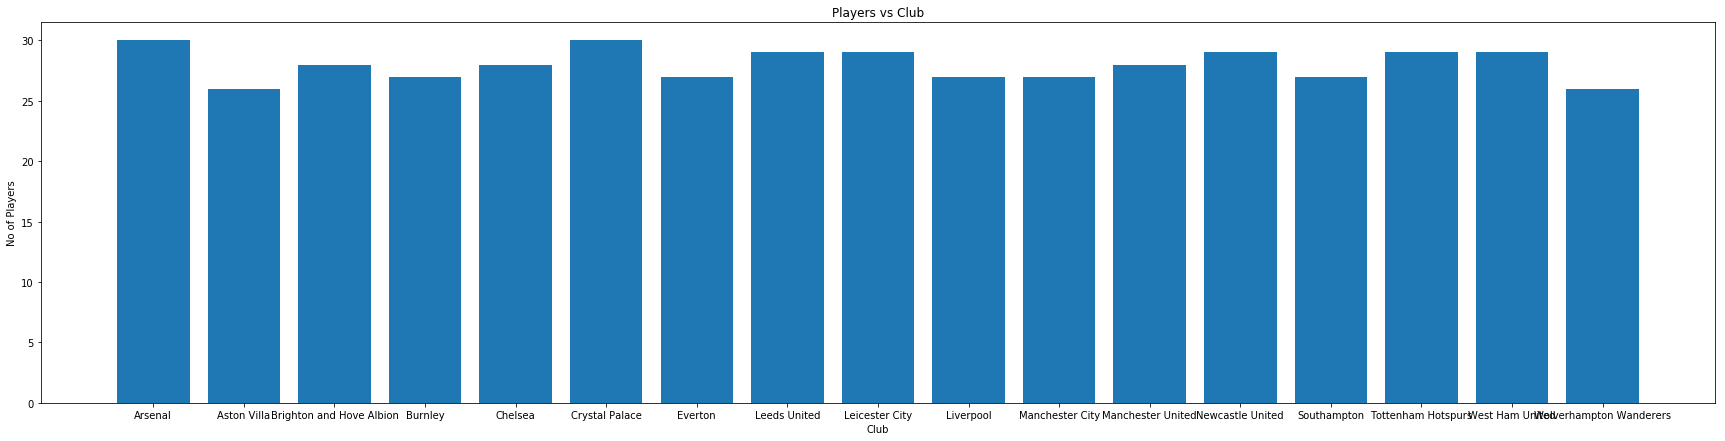

In [55]:
fig = plt.figure(figsize=(30,7))
plt.bar(df_groupby["Club"],df_groupby["Count"])
plt.xlabel("Club")
plt.ylabel("No of Players")
plt.title("Players vs Club")
plt.show()

In [56]:
fig = px.bar(df_groupby,x="Club",y="Count",color = "Club",title = "Club vs Players")
fig.update_traces(textposition='inside')
fig.show()

b. Players vs Postions graph

Inference : less number of forwards and goal keepers compared to defenders and mids

In [57]:
df_groupby = df.groupby('Position').agg(Count = ('Player_Name','nunique')).reset_index()
df_groupby


,Position,Count
0,Defender,172
1,Forward,64
2,Goalkeeper,45
3,Midfielder,195


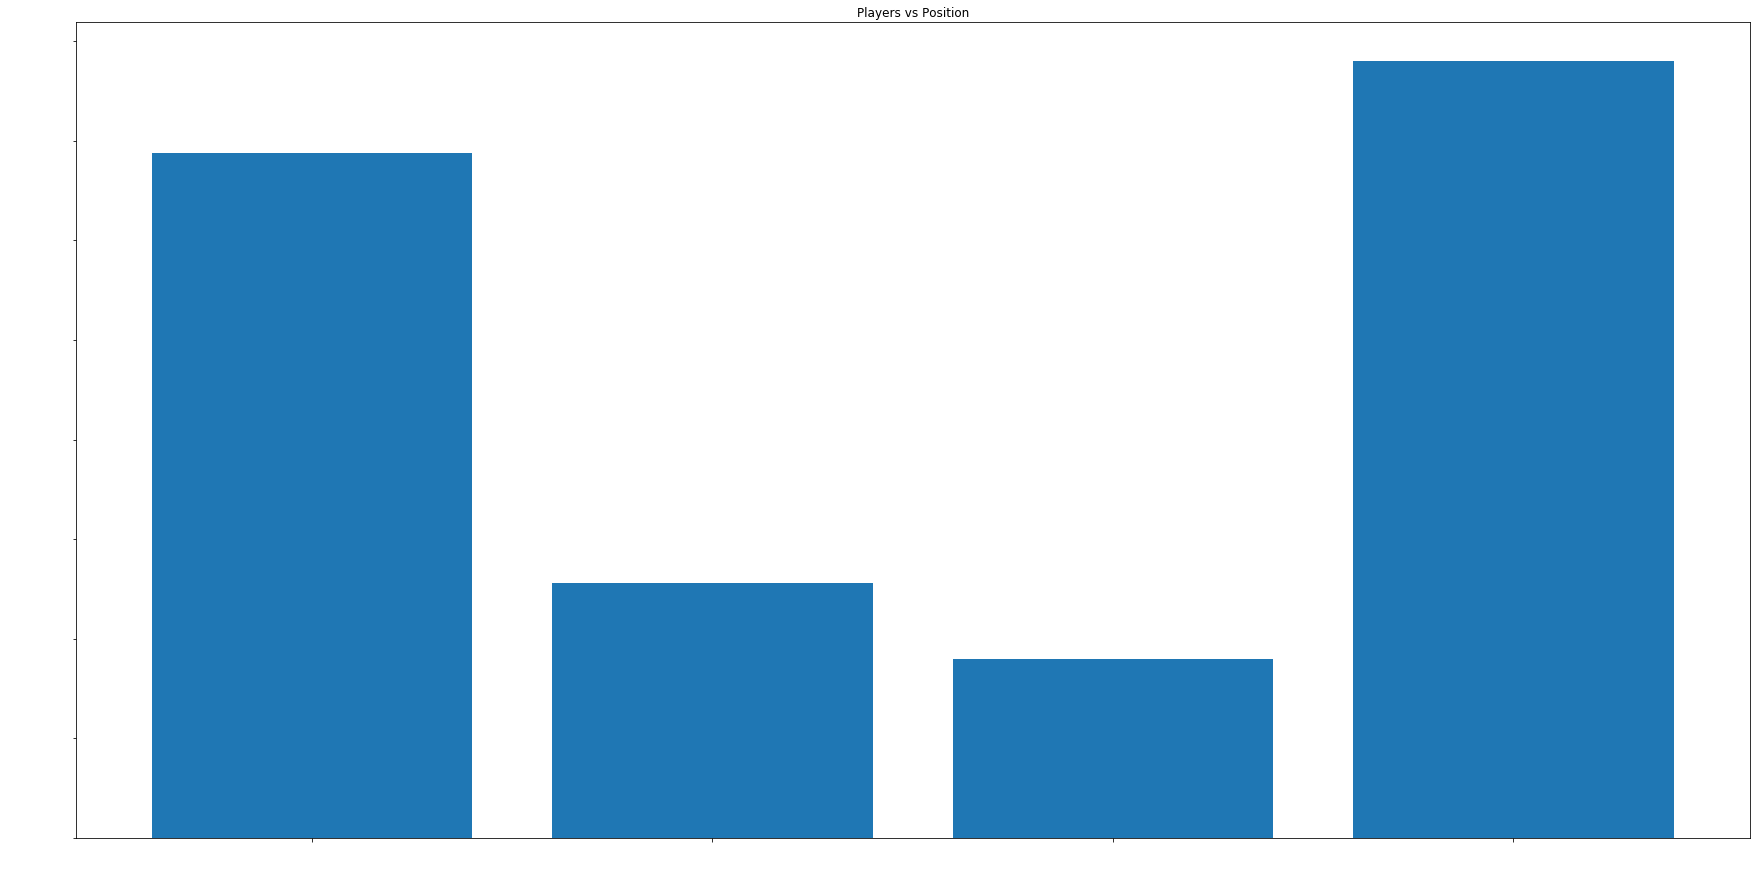

In [58]:
fig = plt.figure(figsize=(30,15))
plt.bar(df_groupby["Position"],df_groupby["Count"])
plt.xticks(fontsize = 20,color = 'white')
plt.yticks(fontsize = 20,color = 'white')
plt.xlabel("Position",fontsize = 20,color = 'white')
plt.ylabel("No of Players",fontsize = 20,color = 'white')
plt.title("Players vs Position")
plt.show()

In [59]:
fig = px.bar(df_groupby,x="Position",y="Count",color = "Position",title = "Position vs Players")
fig.update_traces(textposition='inside')
fig.show()

C. Players vs Goals Scored Graphs

In [60]:
df_groupby = df.groupby('Player_Name').agg(Count = ('Goals_Scored','sum')).reset_index()
df_groupby = df_groupby.sort_values(by = 'Count',ascending=False).reset_index(drop = True)

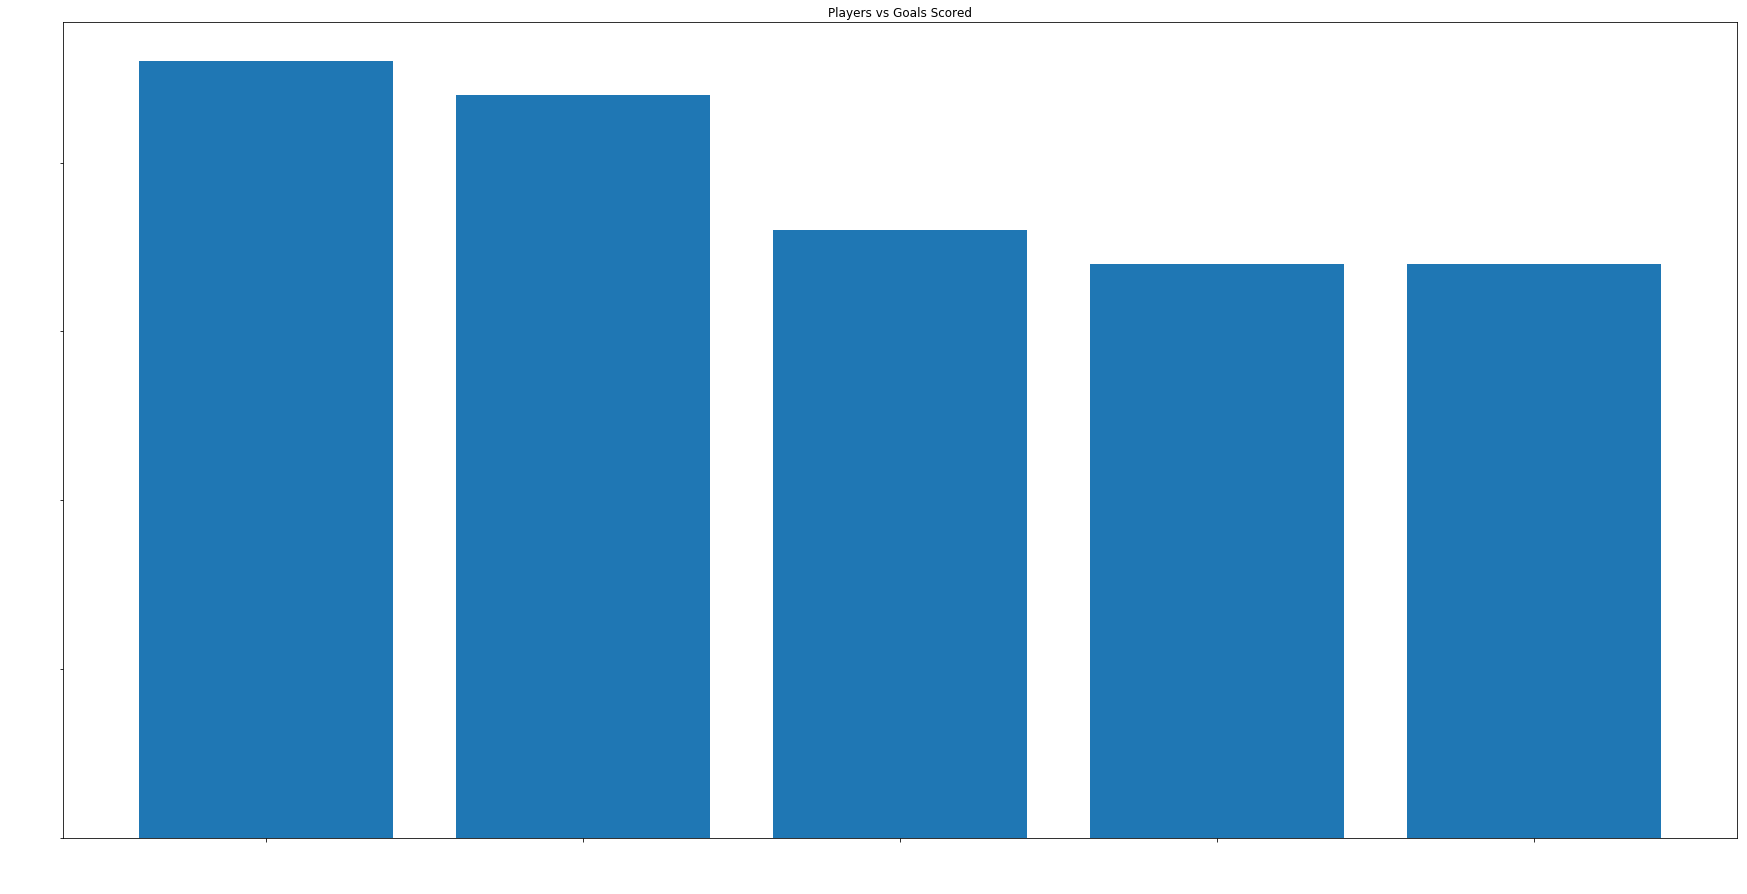

In [61]:
fig = plt.figure(figsize=(30,15))
plt.bar(df_groupby["Player_Name"][:5],df_groupby["Count"][:5])
plt.xticks(fontsize = 20,color = 'white')
plt.yticks(fontsize = 20,color = 'white')
plt.xlabel("Player",fontsize = 20,color = 'white')
plt.ylabel("Goals Scored",fontsize = 20,color = 'white')
plt.title("Players vs Goals Scored")
plt.show()

In [62]:
fig = px.bar(df_groupby[:5],x="Player_Name",y="Count",color = "Player_Name",title = "Players vs Goals")
fig.update_traces(textposition='inside')
fig.show()

Step 5: Preprocessing before clustering

a. Min max scaling of all the numeric objects

a. Min Max Scaling

In [63]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics).columns.tolist()

In [64]:
df.head(5)

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0
1,Alexandre Lacazette,Arsenal,Forward,13,3,129,1916,21,307.4,602.4,797,21,7
2,Bernd Leno,Arsenal,Goalkeeper,0,0,131,3131,37,0.0,702.2,2,11,11
3,Bukayo Saka,Arsenal,Midfielder,5,5,114,2554,31,650.6,493.0,984,8,8
4,Calum Chambers,Arsenal,Defender,0,3,36,751,10,169.4,171.8,77,3,2


In [20]:
scaler = MinMaxScaler()
df[newdf] = scaler.fit_transform(df[newdf])

In [65]:
scaler_2 = StandardScaler()
df[newdf] = scaler_2.fit_transform(df[newdf])

In [66]:
df

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Alex Runnarsson,Arsenal,Goalkeeper,-0.552608,-0.647555,-1.122506,-1.232383,-1.202653,-0.780115,-1.039325,-0.707638,-0.755435,-1.081123
1,Alexandre Lacazette,Arsenal,Forward,3.213401,0.461208,1.375560,0.539871,0.115663,0.443542,1.150596,1.799393,2.606688,0.513521
2,Bernd Leno,Arsenal,Goalkeeper,-0.552608,-0.647555,1.414592,1.672585,1.120094,-0.780115,1.523682,-0.701346,1.005677,1.424747
3,Bukayo Saka,Arsenal,Midfielder,0.895857,1.200384,1.082818,1.134662,0.743432,1.809706,0.741621,2.387618,0.525374,0.741328
4,Calum Chambers,Arsenal,Defender,-0.552608,0.461208,-0.439441,-0.546229,-0.574884,-0.105790,-0.459134,-0.465428,-0.275132,-0.625510
...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,Ruben Vinagre,Wolverhampton Wanderers,Defender,-0.552608,-0.647555,-1.122506,-1.086016,-0.763215,-0.679404,-0.984745,-0.707638,-0.755435,-1.081123
472,Rui Pedro Patricio,Wolverhampton Wanderers,Goalkeeper,-0.552608,-0.647555,1.434108,1.858107,1.998971,-0.780115,1.753217,-0.707638,1.165778,1.196940
473,Vitor Ferreira,Wolverhampton Wanderers,Midfielder,-0.552608,-0.277967,-0.634602,-0.771839,-0.700438,-0.067576,-0.802314,-0.481156,-0.755435,-1.081123
474,Willian Jose,Wolverhampton Wanderers,Forward,-0.262915,-0.277967,-0.361377,-0.215271,-0.386553,-0.119723,-0.766426,0.097632,-0.275132,0.057909


Step 5: K means clustering players on the basis of multiple columns

columns used are : Goals, Assists,Total Points,Minutes, Goals Conceded, Creativity, Influence, Threat, Bonus, Clean Sheets

C:\Users\Shanmukh.Maddila\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Shanmukh.Maddila\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Sh

C:\Users\Shanmukh.Maddila\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:53: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Shanmukh.Maddila\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:53: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Shanmukh.Maddila\Ap

C:\Users\Shanmukh.Maddila\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:53: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Shanmukh.Maddila\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:53: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Shanmukh.Maddila\Ap

C:\Users\Shanmukh.Maddila\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:53: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Shanmukh.Maddila\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:53: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Shanmukh.Maddila\Ap

C:\Users\Shanmukh.Maddila\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:53: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Shanmukh.Maddila\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:53: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Shanmukh.Maddila\Ap

C:\Users\Shanmukh.Maddila\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:53: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Shanmukh.Maddila\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:53: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Shanmukh.Maddila\Ap

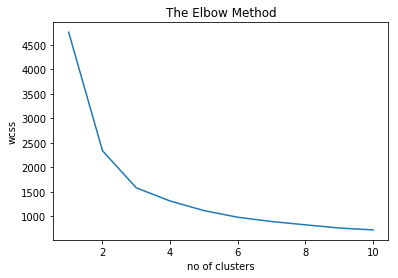

In [67]:
from sklearn.cluster import KMeans
X= df.iloc[:, [3,4,5,6,7,8,9,10,11,12]].values
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)     
plt.plot(range(1,11), wcss,)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show() 

Based on WCSS result, No of optimal clusters =4

In [68]:
kmeansmodel = KMeans(n_clusters=4 , init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)
labels = kmeansmodel.labels_
df["label"]=labels

C:\Users\Shanmukh.Maddila\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:53: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Shanmukh.Maddila\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:53: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Shanmukh.Maddila\Ap

In [70]:
df

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,label
0,Alex Runnarsson,Arsenal,Goalkeeper,-0.552608,-0.647555,-1.122506,-1.232383,-1.202653,-0.780115,-1.039325,-0.707638,-0.755435,-1.081123,2
1,Alexandre Lacazette,Arsenal,Forward,3.213401,0.461208,1.375560,0.539871,0.115663,0.443542,1.150596,1.799393,2.606688,0.513521,1
2,Bernd Leno,Arsenal,Goalkeeper,-0.552608,-0.647555,1.414592,1.672585,1.120094,-0.780115,1.523682,-0.701346,1.005677,1.424747,3
3,Bukayo Saka,Arsenal,Midfielder,0.895857,1.200384,1.082818,1.134662,0.743432,1.809706,0.741621,2.387618,0.525374,0.741328,1
4,Calum Chambers,Arsenal,Defender,-0.552608,0.461208,-0.439441,-0.546229,-0.574884,-0.105790,-0.459134,-0.465428,-0.275132,-0.625510,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,Ruben Vinagre,Wolverhampton Wanderers,Defender,-0.552608,-0.647555,-1.122506,-1.086016,-0.763215,-0.679404,-0.984745,-0.707638,-0.755435,-1.081123,2
472,Rui Pedro Patricio,Wolverhampton Wanderers,Goalkeeper,-0.552608,-0.647555,1.434108,1.858107,1.998971,-0.780115,1.753217,-0.707638,1.165778,1.196940,3
473,Vitor Ferreira,Wolverhampton Wanderers,Midfielder,-0.552608,-0.277967,-0.634602,-0.771839,-0.700438,-0.067576,-0.802314,-0.481156,-0.755435,-1.081123,2
474,Willian Jose,Wolverhampton Wanderers,Forward,-0.262915,-0.277967,-0.361377,-0.215271,-0.386553,-0.119723,-0.766426,0.097632,-0.275132,0.057909,0


In [72]:
fig = px.scatter(df,x="Assists",y="Goals_Scored",color="label",title="K-mean clustering of football players")
fig.update_traces(textposition='top center')
fig.show()

In [83]:
df_0 = df.loc[df['label']==0].sort_values(by=["Goals_Scored","Assists"],ascending=False)
df_1 = df.loc[df['label']==1].sort_values(by=["Goals_Scored","Assists"],ascending=False)
df_2 = df.loc[df['label']==2].sort_values(by=["Goals_Scored","Assists"],ascending=False)
df_3 = df.loc[df['label']==3].sort_values(by=["Goals_Scored","Assists"],ascending=False)

In [89]:
Avg_Goal_Scored_0 = df_0["Goals_Scored"].mean()
Avg_Goal_Scored_1 = df_1["Goals_Scored"].mean()
Avg_Goal_Scored_2 = df_2["Goals_Scored"].mean()
Avg_Goal_Scored_3 = df_3["Goals_Scored"].mean()

In [91]:
print(Avg_Goal_Scored_0,Avg_Goal_Scored_1,Avg_Goal_Scored_2,Avg_Goal_Scored_3)

-0.11694529761603725 2.107739425784953 -0.5094618164874678 -0.15757172378772422


In [84]:

Cluster_0 = df_0["Player_Name"].tolist()[:5]
Cluster_1 = df_1["Player_Name"].tolist()[:5]
Cluster_2 = df_2["Player_Name"].tolist()[:5]
Cluster_3 = df_3["Player_Name"].tolist()[:5]

In [85]:
print(Cluster_0,Cluster_1,Cluster_2,Cluster_3)

['Diogo Jota', 'Joseph Willock', 'Ferran Torres', 'Mason Greenwood', 'Danny Welbeck'] ['Harry Kane', 'Mohamed Salah', 'Bruno Fernandes', 'Patrick Bamford', 'Heung-Min Son'] ['Edward Nketiah', 'Gabriel Teodoro Martinelli Silva', 'Juan Mata', 'Joel Matip', 'Donny van de Beek'] ['Jorge Luiz Frello Filho', 'Ruben Neves', 'Lewis Dunk', 'Kurt Zouma', 'Stuart Armstrong']


Clusters vs No Of Players

Inference : Cluster 3 has less number of player group

In [25]:
df_groupby = df.groupby('label').agg(Count = ('Player_Name','nunique')).reset_index()
df_groupby = df_groupby.sort_values(by = 'Count',ascending=False).reset_index(drop = True)

In [26]:
fig = px.scatter(df_groupby,x="label",y="Count",color="label",title="K-mean clustering of football players")
fig.update_traces(textposition='top center')
fig.show()

Cluster vs Avg Goals
Inference : Cluster 3 has more no of goals

In [27]:
df_groupby = df.groupby('label').agg(Goals = ('Goals_Scored','sum')).reset_index()
df_groupby = df_groupby.sort_values(by = 'Goals',ascending=False).reset_index(drop = True)

In [28]:
fig = px.scatter(df_groupby,x="label",y="Goals",color="label",title="K-mean clustering of football players")
fig.update_traces(textposition='top center')
fig.show()

In [29]:
df[newdf] = scaler.inverse_transform(df[newdf])

In [30]:
df

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,label
0,Alex Runnarsson,Arsenal,Goalkeeper,0.0,0.0,1.0,15.0,0.0,0.0,16.6,0.0,0.0,0.0,1
1,Alexandre Lacazette,Arsenal,Forward,13.0,3.0,129.0,1916.0,21.0,307.4,602.4,797.0,21.0,7.0,3
2,Bernd Leno,Arsenal,Goalkeeper,0.0,0.0,131.0,3131.0,37.0,0.0,702.2,2.0,11.0,11.0,2
3,Bukayo Saka,Arsenal,Midfielder,5.0,5.0,114.0,2554.0,31.0,650.6,493.0,984.0,8.0,8.0,3
4,Calum Chambers,Arsenal,Defender,0.0,3.0,36.0,751.0,10.0,169.4,171.8,77.0,3.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,Ruben Vinagre,Wolverhampton Wanderers,Defender,0.0,0.0,1.0,172.0,7.0,25.3,31.2,0.0,0.0,0.0,1
472,Rui Pedro Patricio,Wolverhampton Wanderers,Goalkeeper,0.0,0.0,132.0,3330.0,51.0,0.0,763.6,0.0,12.0,10.0,2
473,Vitor Ferreira,Wolverhampton Wanderers,Midfielder,0.0,1.0,26.0,509.0,8.0,179.0,80.0,72.0,0.0,0.0,1
474,Willian Jose,Wolverhampton Wanderers,Forward,1.0,1.0,40.0,1106.0,13.0,165.9,89.6,256.0,3.0,5.0,0


In [31]:
df_groupby = df.groupby('label').agg(Goals = ('Goals_Scored','sum')).reset_index()
df_groupby = df_groupby.sort_values(by = 'Goals',ascending=False).reset_index(drop = True)

In [32]:
fig = px.scatter(df_groupby,x="label",y="Goals",color="label",title="K-mean clustering of football players")
fig.update_traces(textposition='top center')
fig.show()

In [33]:

df_groupby = df.groupby('label').agg(Points = ('Total_Points','mean')).reset_index()
df_groupby = df_groupby.sort_values(by = 'Points',ascending=False).reset_index(drop = True)
fig = px.scatter(df_groupby,x="label",y="Points",color="label",title="K-mean clustering of football players")
fig.update_traces(textposition='top center')
fig.show()

In [34]:
df.sort_values(by ="Total_Points",ascending = False)

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,label
315,Bruno Fernandes,Manchester United,Midfielder,18.0,14.0,244.0,3101.0,36.0,1414.9,1292.6,1253.0,36.0,13.0,3
403,Harry Kane,Tottenham Hotspurs,Forward,23.0,14.0,242.0,3083.0,39.0,659.1,1318.2,1585.0,40.0,12.0,3
269,Mohamed Salah,Liverpool,Midfielder,22.0,6.0,231.0,3077.0,41.0,825.7,1056.0,1980.0,21.0,11.0,3
405,Heung-Min Son,Tottenham Hotspurs,Midfielder,17.0,11.0,228.0,3119.0,36.0,1049.9,1052.2,1046.0,26.0,13.0,3
219,Patrick Bamford,Leeds United,Forward,17.0,11.0,194.0,3052.0,50.0,371.0,867.2,1512.0,26.0,10.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Luke Mbete,Manchester City,Defender,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
121,Fikayo Tomori,Chelsea,Defender,0.0,0.0,0.0,45.0,2.0,0.1,26.6,0.0,0.0,0.0,1
26,Sokratis Papastathopoulos,Arsenal,Defender,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
444,Roberto Jimenez Gago,West Ham United,Goalkeeper,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
